In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns

## Visualise a Simulation

To visualise a simulation as graph and animation:

1. **Run a simulation (execute the "run_simulation" function in the simulation.py) with parameters of interest and the parameter "visualise" set to True.** The results will be saved as "states_simulation" in the "results" directory. Each run overwrites the previous one. 

2. **Run all code in this Jupyter notebook.** The data from "states_simulation" will load and provide a visual representation of the simulation.

In [4]:
def create_animation(states):
    # custom colors for EMTY, TREE, FIRE and FIRE_SPREADING
    colors = [(0.4, 0.2, 0),(0.2, 0.8, 0.2), (1, 0, 0), (1, 0, 0)]

    custom_cmap = ListedColormap(colors)

    # Set up the figure and remove axis
    fig, ax = plt.subplots(constrained_layout=True)
    ax.axis("off")

    # Initial plot
    array_plot = ax.imshow(
        states[0],
        vmin=0,
        vmax=(len(colors)-1),
        animated=True,
        cmap=custom_cmap
    )

    # Animation update function
    def update(frame):
        ax.set_title(f'Time Step: {frame}')
        array_plot.set_array(states[frame])
        return [array_plot]

    # Create animation
    num_frames = states.shape[0]
    ani = FuncAnimation(fig, update, frames=num_frames, interval=1000)
    html_representation = HTML(ani.to_jshtml())
    
    # Close the figure to prevent it from being displayed
    plt.close(fig)
    return html_representation

def visualise(file_name):
    with np.load(file_name) as file:
        value_history = file["state"]
        trees, fires = file["perc"][0], file["perc"][1]
        grid_size, num_states, f_rate, p_rate, r_rate =  file["grid"], file["state"].shape[0], file["f"], file["p"], file["r"]
        steady_state = file["steady"]
        
        #print which simulation is ploting:
        print('\033[4m' + f"Simulation of Parameters; grid {grid_size}, {num_states} states, f {f_rate}, p {p_rate}, r {r_rate}:" + "\033[0m")
        print("Reached steady-state.") if steady_state else print("Did not reach steady-state.")
        
        #create graph:
        plt.figure(figsize=(10, 6))

        plt.plot(trees, label="%trees", linewidth=1)  
        plt.plot(fires, label="%fires", linewidth=1)
        plt.hlines(y=f_rate, xmin=0, xmax=len(trees)-1, label=f"f {f_rate}", linewidth=1, linestyle='--', color='green')

        plt.grid(True, linestyle="--", alpha=0.7)
        plt.xlabel("Time Step", fontsize=15) 
        plt.legend(fontsize=14)
        plt.show()
    
        #create animation:
        return create_animation(value_history)

Simulation of Parameters; grid [3 3], 50 states, f 0.3, p 0.3, r 0.0:
Did not reach steady-state.


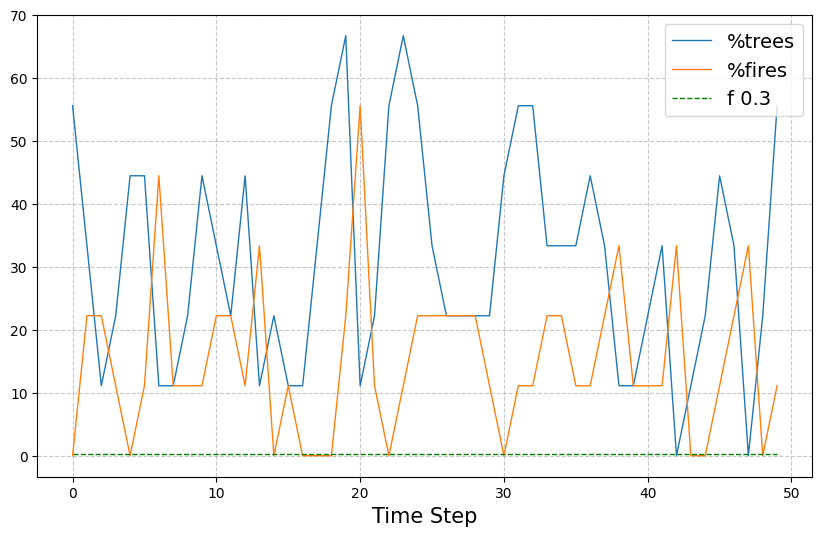

In [5]:
visualise("results/states_simulation.npz")